In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set path for our data
path = "./cardtransactions.csv"

In [4]:
# Read data into a data frame
df = pd.read_csv(path)

In [5]:
# Explore the dataset
df.head()

,Responsible Department,Cardholder Name,Transaction Date,Transaction Amount,Merchant Category Code Description,Merchant Name,Merchant State/Province,Department Contact,Phone #
0,CITY MANAGER,JULIE CHIOU,01/14/01,$317.27,FAST FOOD RESTAURANTS,PANERA BREAD #04472,CA,ERNEST AZEVEDO,408-535-8119
1,CITY MANAGER,JULIE CHIOU,01/14/01,$103.03,FAST FOOD RESTAURANTS,PANERA BREAD #04472,CA,ERNEST AZEVEDO,408-535-8119
2,CITY MANAGER,JULIE CHIOU,01/14/01,$124.98,FAST FOOD RESTAURANTS,PANERA BREAD #04472,CA,ERNEST AZEVEDO,408-535-8119
3,CITY MANAGER,JULIE CHIOU,01/14/01,$490.87,FAST FOOD RESTAURANTS,PANERA BREAD #04472,CA,ERNEST AZEVEDO,408-535-8119
4,CITY MANAGER,JULIE CHIOU,01/14/01,$151.97,FAST FOOD RESTAURANTS,PANERA BREAD #04472,CA,ERNEST AZEVEDO,408-535-8119


In [6]:
# Almost 90,000 transactions
df.shape

(89960, 9)

In [7]:
df.columns

Index(['Responsible Department', 'Cardholder Name', 'Transaction Date',
       'Transaction Amount', 'Merchant Category Code Description',
       'Merchant Name', 'Merchant State/Province', 'Department Contact',
       'Phone #'],
      dtype='object')

In [8]:
# Looks like we have some missing data
df.isnull().values.any()

True

In [9]:
# Missing data is miminal so we'll drop those observations from the data
df.isnull().sum()

Responsible Department                   0
Cardholder Name                          0
Transaction Date                         0
Transaction Amount                       0
Merchant Category Code Description      10
Merchant Name                            0
Merchant State/Province               1087
Department Contact                       0
Phone #                                  0
dtype: int64

In [10]:
df['Merchant State/Province'].value_counts()

CA    51817
IL    15384
WA     6002
TX     2532
PA     1015
GA      941
MA      863
NY      859
CO      622
VA      614
NV      606
MN      529
FL      519
AZ      468
DC      467
OH      461
NE      360
TN      358
NJ      349
WI      338
KS      334
NC      319
CT      283
MD      275
OR      264
MO      263
MI      256
UT      206
KY      198
IA      195
OK      194
IN      136
NH      111
AL      110
AR       99
RI       85
LA       80
ME       72
ID       53
SC       52
MS       41
HI       33
WV       26
NM       17
ND       17
SD       13
MT       12
DE       11
VT        8
WY        6
Name: Merchant State/Province, dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.shape

(88873, 9)

In [13]:
df.isnull().values.any()

False

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88873 entries, 0 to 89959
Data columns (total 9 columns):
Responsible Department                88873 non-null object
Cardholder Name                       88873 non-null object
Transaction Date                      88873 non-null object
Transaction Amount                    88873 non-null object
Merchant Category Code Description    88873 non-null object
Merchant Name                         88873 non-null object
Merchant State/Province               88873 non-null object
Department Contact                    88873 non-null object
Phone #                               88873 non-null object
dtypes: object(9)
memory usage: 6.8+ MB


In [15]:
df.describe()

,Responsible Department,Cardholder Name,Transaction Date,Transaction Amount,Merchant Category Code Description,Merchant Name,Merchant State/Province,Department Contact,Phone #
count,88873,88873,88873,88873,88873,88873,88873,88873,88873
unique,38,1111,326,35337,315,26122,50,20,19
top,"PARKS, RECREATION & NEIGH",MARCIA ROUVELL,02/15/12,$2.04,STATIONERY STORE/SUPPLIES,AMAZON MKTPLACE PMTS,CA,JULIE JENNINGS,408-277-2450
freq,19287,2928,921,1748,14652,3239,51817,20228,23109


In [16]:
# Top transactions for each cardholder, Marcia Rouvell, has the most transactions.
df['Cardholder Name'].value_counts().head()

MARCIA ROUVELL      2928
ALBERT RODRIGUEZ     852
JEANNETTE MESTAZ     722
TINA YU TAYLOR       708
JULIE CHIOU          675
Name: Cardholder Name, dtype: int64

In [17]:
# We look to have about 13 years of transaction data
df['Transaction Date'].min()

'01/14/01'

In [18]:
df['Transaction Date'].max()

'12/15/13'

In [19]:
# Formatting 'Transaction Amount' data to float for analysis of transaction by dollar amount. 
df['Transaction Amount'] = df['Transaction Amount'].str.replace("$", "")
df['Transaction Amount'] = df['Transaction Amount'].str.replace("(", "-")
df['Transaction Amount'] = df['Transaction Amount'].str.replace(")", "")
df['Transaction Amount'] = df['Transaction Amount'].str.replace(",", "")
df['Transaction Amount'] = df['Transaction Amount'].astype(float)

In [20]:
df['Transaction Amount'].describe()

count    88873.000000
mean       297.870199
std        709.875531
min      -6310.510000
25%         30.420000
50%         95.320000
75%        285.470000
max      14185.130000
Name: Transaction Amount, dtype: float64

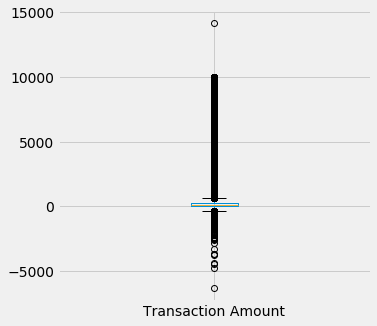

In [39]:
# There seems to be a lot of outliers but we should exclude the charge offs. 
plt.style.use('fivethirtyeight')
df.boxplot(column=['Transaction Amount'], figsize=(5,5));

In [22]:
pos_transactions = df[df['Transaction Amount'] > 0]

In [23]:
df['Transaction Amount'].describe()

count    88873.000000
mean       297.870199
std        709.875531
min      -6310.510000
25%         30.420000
50%         95.320000
75%        285.470000
max      14185.130000
Name: Transaction Amount, dtype: float64

In [24]:
pos_transactions['Transaction Amount'].describe()

count    86641.000000
mean       310.123187
std        712.053989
min          0.010000
25%         34.000000
50%         99.940000
75%        295.000000
max      14185.130000
Name: Transaction Amount, dtype: float64

In [26]:
large_transactions = df[df['Transaction Amount'] > 300]

In [54]:
large_transactions['Transaction Amount'].describe()

count    21169.000000
mean      1001.436658
std       1193.262152
min        300.100000
25%        419.480000
50%        596.360000
75%       1024.310000
max      14185.130000
Name: Transaction Amount, dtype: float64

In [59]:
df['Merchant Category Code Description'].value_counts().head(10)

STATIONERY STORE/SUPPLIES        14652
HOME SUPPLY WAREHOUSE STORES      5319
BOOK STORES                       5195
BUSINESS SERVICES -OTHER          5167
WHOLSALE INDUST SUPP              3521
PUBLISHING/PRINTING               3293
GROCERY STORES,SUPERMARK          3170
EATING PLACES AND RESTAURANTS     2918
FAST FOOD RESTAURANTS             2456
MISCELLANEOUS AND SPECIAL         1778
Name: Merchant Category Code Description, dtype: int64

In [60]:
df['Responsible Department'].value_counts().head(10)

PARKS, RECREATION & NEIGH      19287
PUBLIC WORKS                   11703
POLICE                         11406
LIBRARY                         9084
ENVIRONMENTAL SERVICES          8624
FIRE                            5213
TRANSPORTATION                  4730
AIRPORT                         3426
PLANNING, BLDG & CODE ENFOR     2477
ECONOMIC DEVELOPMENT            2280
Name: Responsible Department, dtype: int64